<a href="https://colab.research.google.com/github/martins-jean/Employee-Turnover-Prediction-in-Python/blob/main/employee_turnover_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Why should we care about employee churn?</h1>
<p text-align='justify'>Employee turnover is the process of employees leaving the company. Also known as churn or attrition, it represents high costs for any firm. Taking a data-driven approach to people management and being able to predict churn can enable better hiring and retention decisions.

<h2>I. Exploratory Data Analysis</h2>

In [1]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset from its GitHub repository and transform into a Pandas dataframe
url = 'https://raw.githubusercontent.com/martins-jean/Employee-Turnover-Prediction-in-Python/main/turnover_data.csv'
data = pd.read_csv(url)
data.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
# Analyze the contents of our dataset further
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   satisfaction          14999 non-null  float64
 1   evaluation            14999 non-null  float64
 2   number_of_projects    14999 non-null  int64  
 3   average_montly_hours  14999 non-null  int64  
 4   time_spend_company    14999 non-null  int64  
 5   work_accident         14999 non-null  int64  
 6   churn                 14999 non-null  int64  
 7   promotion             14999 non-null  int64  
 8   department            14999 non-null  object 
 9   salary                14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# Look for unique values
print(data.salary.unique())

['low' 'medium' 'high']


<h2>II. Transforming Categorical Variables</h2>

In [5]:
# Change the type of the "salary" column to categorical
data.salary = data.salary.astype('category')

# Provide the correct order of the categories
data.salary = data.salary.cat.reorder_categories(['low', 'medium', 'high'])

# Encode the categories with integer values
data.salary = data.salary.cat.codes

In [6]:
# Get dummies and save them in a new dataframe
departments = pd.get_dummies(data.department)

In [7]:
departments.head()

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


<p text-align='justify'>To avoid the dummy variable trap, where two or more dummy variables created by one-hot encoding are highly correlated (multi-collinear), we drop the technical department column.</p>

In [8]:
# Drop the "accounting" column to avoid "dummy trap"
departments = departments.drop("accounting", axis=1)

# Drop the old column "department" as you don't need it anymore
data = data.drop("department", axis=1)

# Join the new DataFrame "departments" to your employee dataset: done
data = data.join(departments)

<h1>III. Descriptive Statistics</h1>

In [9]:
# Get the total number of observations and save it in a variable
n_employees = len(data)

# Print the number of employees who stayed / left
print(data.churn.value_counts())

# Print the percentage of employees who stayed / left
print(data.churn.value_counts() / n_employees * 100)

0    11428
1     3571
Name: churn, dtype: int64
0    76.191746
1    23.808254
Name: churn, dtype: float64


<p text-align='justify'>A 23.8% of churn is significant so it is crucial to understand what causes it and if data-driven measures can be taken to remediate this situation. We will now explore correlations between features.<p>

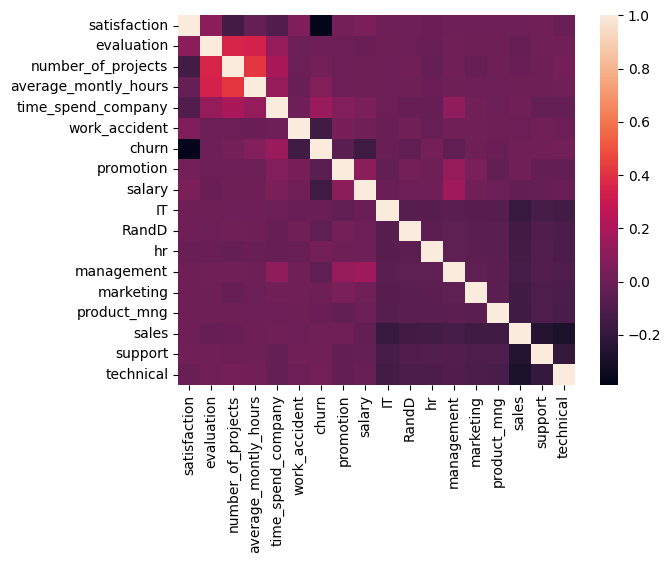

In [10]:
# Build a correlation matrix to evaluate the relationships between features
corr_matrix = data.corr()
sns.heatmap(corr_matrix)
plt.show()

<h1>IV. Splitting the Data</h1>

In [11]:
# Set the target (dependent variable) which needs to be predicted
target = data.churn

# Drop the churn column in order to obtain our features matrix
features = data.drop('churn', axis = 1)

In [12]:
# Split the data into a training set and a testing set using scikit-learn to increase generalization and avoid overfitting
from sklearn.model_selection import train_test_split

target_train, target_test, features_train, features_test = train_test_split(target, features, test_size = 0.25, random_state = 42)

<h1>VI. Decision Tree Classification</h1>
<p tex-align='justify'>The decision tree algorithm aims to achieve partitions in the terminal nodes that are as pure as possible. The Gini index is one of the methods used to achieve this. It is calculated based on the proportion of samples in each group.</p>

In [13]:
# Remember the number of employees who stayed versus those who left
stayed = 11428
left = 3571
total = stayed + left

# Calculate the gini index
gini = 2 * (stayed / total) * (left / total)
print(gini)

0.36279848707472784


<p text-align='justify'>Given the Gini index that would result from splitting by either variable A or B, respectively, decide by which variable the tree should split next.</p>

In [14]:
# Gini index in case of splitting by variable A or B
gini_A = 0.65
gini_B = 0.15

# We check which Gini is lower and use it for spliting
if gini_A < gini_B:
  print('Split by A!')
else:
  print('Split by B!')

Split by B!


In [15]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42)

# Apply a decision tree model to fit features to the target in the training set
model.fit(features_train,target_train)

# Check the accuracy score of the prediction for the training set
model.score(features_train,target_train)*100

100.0

In [16]:
# Check the accuracy score of the prediction for the test set
model.score(features_test,target_test)*100

97.22666666666666

<p text-align='justify'>In Decision Tree classification tasks, overfitting is usually the result of deeply grown trees. As the comparison of accuracy scores on the train and test sets shows, we have overfitting in our results. This can also be learned from a tree visualization. We will now export the decision tree into a text document which can then be used for visualization.</p>

In [17]:
# Import the tree graphical visualization export function
from sklearn.tree import export_graphviz

# Apply Decision Tree model to fit features to the target
model.fit(features_train,target_train)

# Export the tree to a dot file
export_graphviz(model,"tree.dot")

<h1>Pruning the Tree</h1>
<p text-align='justify'>Overfitting is a classic problem in analytics, especially for the decision tree algorithm. Once the tree is fully grown, it may provide highly accurate predictions for the training sample, yet fail to be that accurate on the test set. For that reason, the growth of the decision tree is usually controlled by:</p>
<ul>
<li>“Pruning” the tree and setting a limit on the maximum depth it can have.</li>
<li>Limiting the minimum number of observations in one leaf of the tree.</li>
</ul>

In [18]:
# Initialize the DecisionTreeClassifier while limiting the depth of the tree to 5
model_depth_5 = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model
model_depth_5.fit(features_train,target_train)

# Print the accuracy of the prediction for the training set
print(model_depth_5.score(features_train,target_train)*100)

# Print the accuracy of the prediction for the test set
print(model_depth_5.score(features_test,target_test)*100)

97.71535247577563
97.06666666666666


<h1>Limiting the Sample Size</h1>

In [19]:
# Initialize the DecisionTreeClassifier while limiting the sample size in leaves to 100
model_sample_100 = DecisionTreeClassifier(min_samples_leaf=100, random_state=42)

# Fit the model
model_sample_100.fit(features_train,target_train)

# Print the accuracy of the prediction (in percentage points) for the training set
print(model_sample_100.score(features_train,target_train)*100)

# Print the accuracy of the prediction (in percentage points) for the test set
print(model_sample_100.score(features_test,target_test)*100)

96.57747355320473
96.13333333333334


<h1>VII. Model Evaluation</h1>
<p text-align='justify'>Depending on what we want to focus on, we will choose one metric over another:
<ul>
<li>When we want the % of churn predictions that were correct, we will use precision.</li>
<li> When we want to focus on the % of correct churn predictions among leavers, we can use recall.</li>
<li>When we want to focus on the % of correct churn predictions among stayers, we can use specificity.</li>
</ul>

In [20]:
# Import the function to calculate precision score
from sklearn.metrics import precision_score

# We predict whether employees will churn using the test set
prediction = model.predict(features_test)

# We calculate precision score by comparing target_test with the prediction
precision_score(target_test, prediction)

0.9240641711229947

In [21]:
# We import the function to calculate recall score
from sklearn.metrics import recall_score

# We use the initial model to predict churn
prediction = model.predict(features_test)

# We calculate recall score by comparing target_test with the prediction
recall_score(target_test, prediction)

0.9632107023411371

In [22]:
# We import the function to calculate ROC/AUC score
from sklearn.metrics import roc_auc_score

# We use initial model to predict churn (based on features_test)
prediction = model.predict(features_test)

# We calculate ROC/AUC score by comparing target_test with the prediction
roc_auc_score(target_test, prediction)

0.9691623087590718

<p text-align='justify'>The accuracy score is a good choice when classes in the dataset are balanced and that's why we used other metrics so far. Nevertheless, they don't fully resolve the class imbalance. To do this, what we can do is to change prior probabilities. We just need to tell Python to balance class weights which will make probability of both being 0 and 1 equal to 50%. This will probably negatively affect the general accuracy as a result of increased Gini, but AUC and especially Recall should probably be improved, as now both classes are equally important.</p>

In [23]:
# We initialize the DecisionTreeClassifier
model_depth_5_b = DecisionTreeClassifier(max_depth=5,class_weight="balanced",random_state=42)

# We fit the model
model_depth_5_b.fit(features_train,target_train)

# We print the accuracy of the prediction (in percentage points) for the test set
print(model_depth_5_b.score(features_test,target_test)*100)

93.70666666666668


<p text-align='justify'>We will now compare the balanced and imbalanced employee churn models.</p>

In [24]:
# Print the recall score
print("Imbalanced recall_score: " + str(recall_score(target_test,prediction)))
# Print the ROC/AUC score
print("Imbalanced roc_auc_score: " + str(roc_auc_score(target_test,prediction)))

# Initialize the model
model_depth_7_b = DecisionTreeClassifier(max_depth=7,class_weight="balanced",random_state=42)
# Fit it to the training component
model_depth_7_b.fit(features_train,target_train)
# Make prediction using test component
prediction_b = model_depth_7_b.predict(features_test)
# Print the recall score for the balanced model
print("Balanced recall_score: " + str(recall_score(target_test, prediction_b)))
# Print the ROC/AUC score for the balanced model
print("Balanced roc_auc_score: " + str(roc_auc_score(target_test, prediction_b)))

Imbalanced recall_score: 0.9632107023411371
Imbalanced roc_auc_score: 0.9691623087590718
Balanced recall_score: 0.9319955406911928
Balanced roc_auc_score: 0.959863876199084


<h1>VIII. Hyperparameter tuning</h1>
<p text-align='justify'>How do we know which depth of the tree is the ideal? Same goes for other parameters covered until now. The answer is very simple, we just try different values and find the one that provides best possible predictions. To find the optimal values for those hyperparameters, one needs to create a grid, a list of applicable values that he or she wants to test and then search among those values the one that achieves highest accuracy.</p>

In [25]:
# We import the function for implementing cross validation
from sklearn.model_selection import cross_val_score

# We use that function to print the cross validation score for 10 folds
print(cross_val_score(model,features,target,cv=10))

[0.98533333 0.98533333 0.974      0.96533333 0.96       0.97933333
 0.99       0.99333333 1.         1.        ]


In [26]:
# Generate values for maximum depth
depth = [i for i in range(5,21,1)]

# Generate values for minimum sample size
samples = [i for i in range(50,500,50)]

# Create the dictionary with parameters to be checked
parameters = dict(max_depth=depth, min_samples_leaf=samples)

In [27]:
# We import the GridSearchCV function
from sklearn.model_selection import GridSearchCV

# Set up parameters: done
parameters = dict(max_depth=depth, min_samples_leaf=samples)

# Initialize the param_search function using the GridSearchCV function, initial model and parameters above
param_search = GridSearchCV(model, parameters, cv=3)

# Fit the param_search to the training dataset
param_search.fit(features_train, target_train)

# print the best parameters found
print(param_search.best_params_)

{'max_depth': 5, 'min_samples_leaf': 50}


<p text-align='justify'>One of the main reasons we chose to use Decision Tree algorithm is that it provides interpretability. We can not only visualize and explain it, but we can also understand what are the important features that drive the decision to leave the company. Fortunately, once Decision Tree is developed, sklearn can easily calculate feature importances. The latter is equal to the relative decrease in Gini due to the selected feature. Once the calculation is done for all features, the values are rescaled to sum up to 100%. As a result, higher percentage speaks about the feature being more important.</p>

In [28]:
# Initialize the model
model_best = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, class_weight="balanced",random_state=42)

# Fit it to the training component
model_best.fit(features_train, target_train)

# Make prediction using test component
prediction_b = model_best.predict(features_test)

# Calculate feature importances
feature_importances = model_best.feature_importances_

# Create a list of features: done
feature_list = list(features)

# Save the results inside a DataFrame using feature_list as an index
relative_importances = pd.DataFrame(index=feature_list, data=feature_importances, columns=["importance"])

# Sort values to learn most important features
relative_importances.sort_values(by="importance", ascending=False)

,importance
satisfaction,0.453971
time_spend_company,0.397473
evaluation,0.104644
average_montly_hours,0.033545
number_of_projects,0.007103
technical,0.002226
hr,0.001038
promotion,0.000000
salary,0.000000
work_accident,0.000000


In [29]:
# Select only features with relative importance higher than 1%
selected_features = relative_importances[relative_importances.importance>0.01]

# Create a list from those features: done
selected_list = selected_features.index

# Transform both features_train and features_test components to include only selected features
features_train_selected = features_train[selected_list]
features_test_selected = features_test[selected_list]
print(features_train_selected)
print(features_test_selected)

       satisfaction  evaluation  average_montly_hours  time_spend_company
14480          0.38        0.86                   139                   6
1934           0.78        0.93                   225                   5
7900           0.56        0.71                   243                   3
2952           0.96        0.62                   217                   2
4367           0.83        0.53                   211                   4
...             ...         ...                   ...                 ...
5191           0.52        0.96                   246                   3
13418          0.49        0.65                   233                   7
5390           0.66        0.73                   249                   2
860            0.79        1.00                   218                   5
7270           0.98        0.86                   219                   4

[11249 rows x 4 columns]
       satisfaction  evaluation  average_montly_hours  time_spend_company
6723        

<p text-align='justify'>Out of the 17 initial features, we were able to reduce dimensionality to only four features. We will now repeat some of the steps we did previously using only our shortlisted features.</p>

In [30]:
# Initialize the model
model_best = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, class_weight="balanced",random_state=42)

# Fit it to the training component
model_best.fit(features_train_selected, target_train)

# Make prediction using test component
prediction_best = model_best.predict(features_test_selected)

# Print the general accuracy of the model_best
print(model_best.score(features_test_selected, target_test) * 100)

# Print the recall score of the model predictions
print(recall_score(target_test, prediction_best) * 100)

# Print the ROC/AUC score of the model predictions
print(roc_auc_score(target_test, prediction_best) * 100)

93.46666666666667
91.9732441471572
92.95472582401672
